In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install kaggle


****
# Reading and Displaying the Data #
****

In [3]:
import os
import pandas as pd

# Set up Kaggle credentials (if not in the default ~/.kaggle/ folder)
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Use Kaggle API to download the dataset
!kaggle datasets download -d datamunge/sign-language-mnist --unzip

# Read the training and testing data directly
tr = pd.read_csv('sign_mnist_train.csv')
te = pd.read_csv('sign_mnist_test.csv')

# Preview the datasets
print("Training Data:")
print(tr.head())
print("\nTesting Data:")
print(te.head())


Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 81% 51.0M/62.6M [00:00<00:00, 116MB/s]
100% 62.6M/62.6M [00:00<00:00, 107MB/s]
Training Data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       

In [4]:
tr.shape

(27455, 785)

****
# Data Preprocessing #
****

In [5]:
# Splitting the datasets into Features (Pixels) and Target Variables

tr_x=tr.iloc[:,1:]
tr_y=tr.iloc[:,:1]
te_x=te.iloc[:,1:]
te_y=te.iloc[:,:1]
print(tr_x.shape,tr_y.shape,te_x.shape,te_y.shape)

(27455, 784) (27455, 1) (7172, 784) (7172, 1)


In [6]:
# Each picture or data input is a 28 X 28 Grayscale matrix
# We need to convert the input to that

tr_x=tr_x.to_numpy().reshape(-1,28,28)  # Converting to 1D then reshaping
te_x=te_x.to_numpy().reshape(-1,28,28)  # Converting to 1D then reshaping
print(tr_x.shape,te_x.shape)

(27455, 28, 28) (7172, 28, 28)


In [7]:
# For our target variable we will one hot encode it
# tr_y and te_y are in the shape of (n,1), we need to convert this to (n,) for pd.get_dummies to work.
# Therefore we use squeeze function

tr_y=pd.get_dummies(tr_y.squeeze())
te_y=pd.get_dummies(te_y.squeeze())
print(tr_y.shape,te_y.shape)

(27455, 24) (7172, 24)


In [8]:
# Final shapes of inputs and target variables for training and testing datasets

print("Training: ",tr_x.shape,tr_y.shape)
print("Testing: ",te_x.shape,te_y.shape)

Training:  (27455, 28, 28) (27455, 24)
Testing:  (7172, 28, 28) (7172, 24)


****
# Data Preparation #
****

In [9]:
# importing
from sklearn.model_selection import train_test_split

In [10]:
trx,valx,tra_y,valy=train_test_split(tr_x,tr_y,test_size=0.15,random_state=20)

****
# Convulational Neural Network #
****

In [11]:
# importing

import keras as k
from keras import models,layers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [12]:
mod=models.Sequential()

# CNN Layer 1

mod.add(layers.Conv2D(64,(3,3),input_shape=(28,28,1),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))

# CNN Layer 2

mod.add(layers.Conv2D(128,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))

# CNN Later 3
mod.add(layers.Conv2D(256,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.2))

# CNN Layer 4

mod.add(layers.Conv2D(50,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.2))

# CNN Layer 5

mod.add(layers.Conv2D(25,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.Dropout(0.1))

# Flattening

mod.add(layers.Flatten())

# Fully Connected layer 1
mod.add(layers.Dense(1024,activation='relu'))
mod.add(layers.BatchNormalization())

# Fully Connected layer 2

mod.add(layers.Dense(512,activation='relu'))
mod.add(layers.BatchNormalization())

# Fully Connected layer 3

mod.add(layers.Dense(256,activation='relu'))
mod.add(layers.BatchNormalization())

# Fully Connected layer 4

mod.add(layers.Dense(64,activation='relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.Dropout(0.2))

# Output Layer

mod.add(layers.Dense(24,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
opt=k.optimizers.Adam(learning_rate=0.005)
mod.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
mod.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 50)          │         115,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 7, 7, 25)            │              

 Total params: 2,435,265 (9.29 MB)

 Trainable params: 2,430,507 (9.27 MB)

 Non-trainable params: 4,758 (18.59 KB)

In [14]:
lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.05,patience=5)
es=EarlyStopping(monitor='val_accuracy',patience=8,restore_best_weights=True)

In [ ]:
modh=mod.fit(trx,tra_y,batch_size=16,epochs=10,validation_data=(valx,valy),callbacks=[lr,es])

Epoch 1/10
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 1106s 747ms/step - accuracy: 0.5540 - loss: 1.4725 - val_accuracy: 0.7813 - val_loss: 0.7520 - learning_rate: 0.0050
Epoch 2/10
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 1090s 739ms/step - accuracy: 0.9343 - loss: 0.2193 - val_accuracy: 0.9808 - val_loss: 0.0621 - learning_rate: 0.0050
Epoch 3/10
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 1075s 721ms/step - accuracy: 0.9602 - loss: 0.1272 - val_accuracy: 0.9563 - val_loss: 0.1608 - learning_rate: 0.0050
Epoch 4/10
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 1107s 724ms/step - accuracy: 0.9654 - loss: 0.1097 - val_accuracy: 0.9828 - val_loss: 0.0424 - learning_rate: 0.0050
Epoch 5/10
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 1121s 737ms/step - accuracy: 0.9785 - loss: 0.0711 - val_accuracy: 0.9900 - val_loss: 0.0393 - learning_rate: 0.0050
Epoch 6/10
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 1064s 710ms/step - accuracy: 0.9766 - loss: 0.0782 - val_accuracy: 0.9983 - val_loss: 0.0070 - learning_rate: 0.0050
Epoch 7/10
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 1042

In [ ]:
pred=mod.predict(te_x)

In [ ]:
te_y=np.argmax(te_y,axis=1)
pred=np.argmax(pred,axis=1)

****
# Evaluation Metrics #
****

In [ ]:
# importing

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [23]:
print('Accuracy: ',accuracy_score(te_y,pred),'\n')
print('Precision: ',precision_score(te_y,pred,average='micro'),'\n')
print('Recall: ',recall_score(te_y,pred,average='micro'),'\n')
print('F1 Score: ',f1_score(te_y,pred,average='micro'),'\n')

Accuracy:  0.9771332961517011 

Precision:  0.9771332961517011 

Recall:  0.9771332961517011 

F1 Score:  0.9771332961517011 



In [22]:
print('Classification Report:\n\n',classification_report(te_y,pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       0.98      1.00      0.99       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      0.95      0.97       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
           9       0.94      1.00      0.97       331
          10       1.00      1.00      1.00       209
          11       1.00      1.00      1.00       394
          12       0.87      0.93      0.90       291
          13       0.99      1.00      0.99       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       0.97      0.78      0.86       144
  

<Axes: >

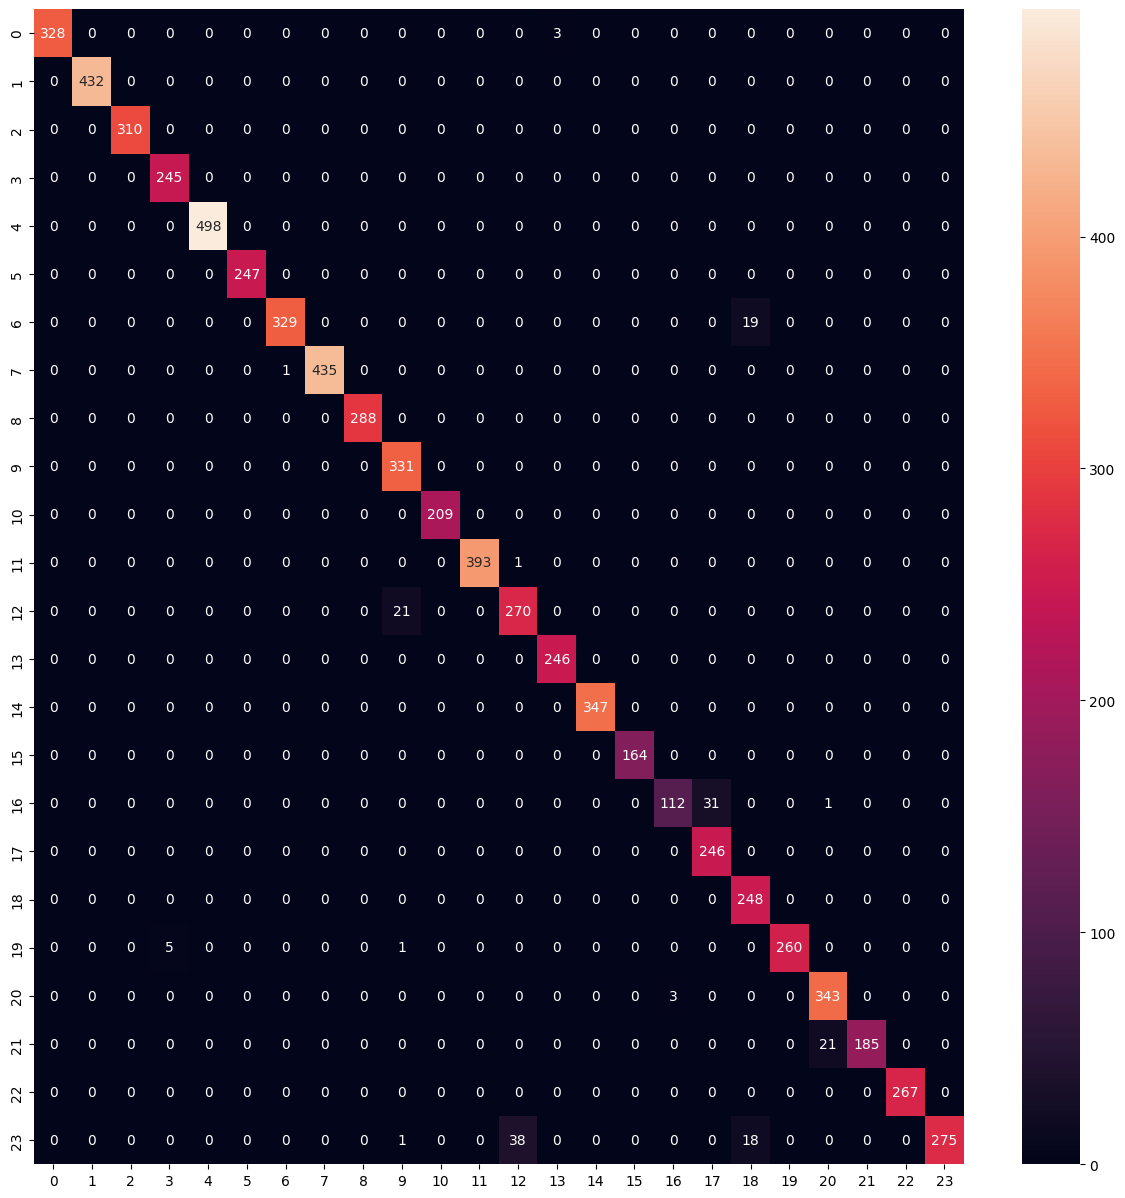

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(te_y,pred),annot=True,fmt='d')

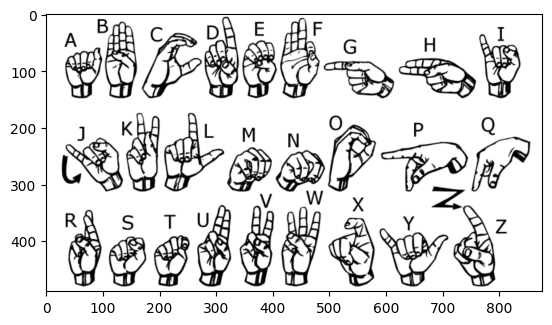

In [25]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread("/content/american_sign_language.PNG")
fig, ax = plt.subplots()
ax.imshow(im, cmap='gray')  # Customize as needed
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


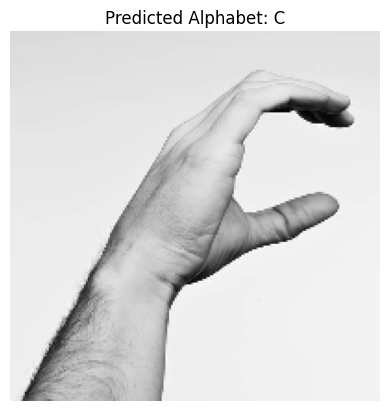

2

In [28]:
import numpy as np
import cv2  # For image processing

def preprocess_image(image_path):
    """
    Preprocess an image to match the MNIST dataset format.
    Args:
        image_path (str): Path to the image.
    Returns:
        np.array: Preprocessed image ready for prediction.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    image = cv2.resize(image, (28, 28))  # Resize to 28x28 pixels
    image = np.expand_dims(image, axis=-1)  # Add channel dimension (28, 28) -> (28, 28, 1)
    image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 28, 28, 1)
    return image

def predict_image(image_path):
    """
    Predict the label of an image using the trained model.
    Args:
        image_path (str): Path to the image.
    Returns:
        int: Predicted label.
    """
    preprocessed_image = preprocess_image(image_path)
    prediction = mod.predict(preprocessed_image)
    predicted_label = np.argmax(prediction)  # Get the index of the highest probability
    predicted_alphabet = alphabet_map[predicted_label]  # Map to alphabet

    # Load the original image for display
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(original_image, (200, 200))  # Resize for better visualization

    # Display the image with the predicted label
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Predicted Alphabet: {predicted_alphabet}")
    plt.axis('off')
    plt.show()
    return predicted_label


# Define alphabet-to-number mapping
alphabet_map = {i: chr(65 + i) for i in range(26)}  # {0: 'A', 1: 'B', ..., 25: 'Z'}

# Test with an image
image_path = '/content/istockphoto-177132972-612x612.jpg'  # Replace with your image path
predict_image(image_path)


In [29]:
mod.save('SignLanguage.h5')  # Saves the model in HDF5 format
print("Model saved as 'my_trained_model.h5'")

Model saved as 'my_trained_model.h5'
